In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_val, y_val) = cifar100.load_data()

In [3]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


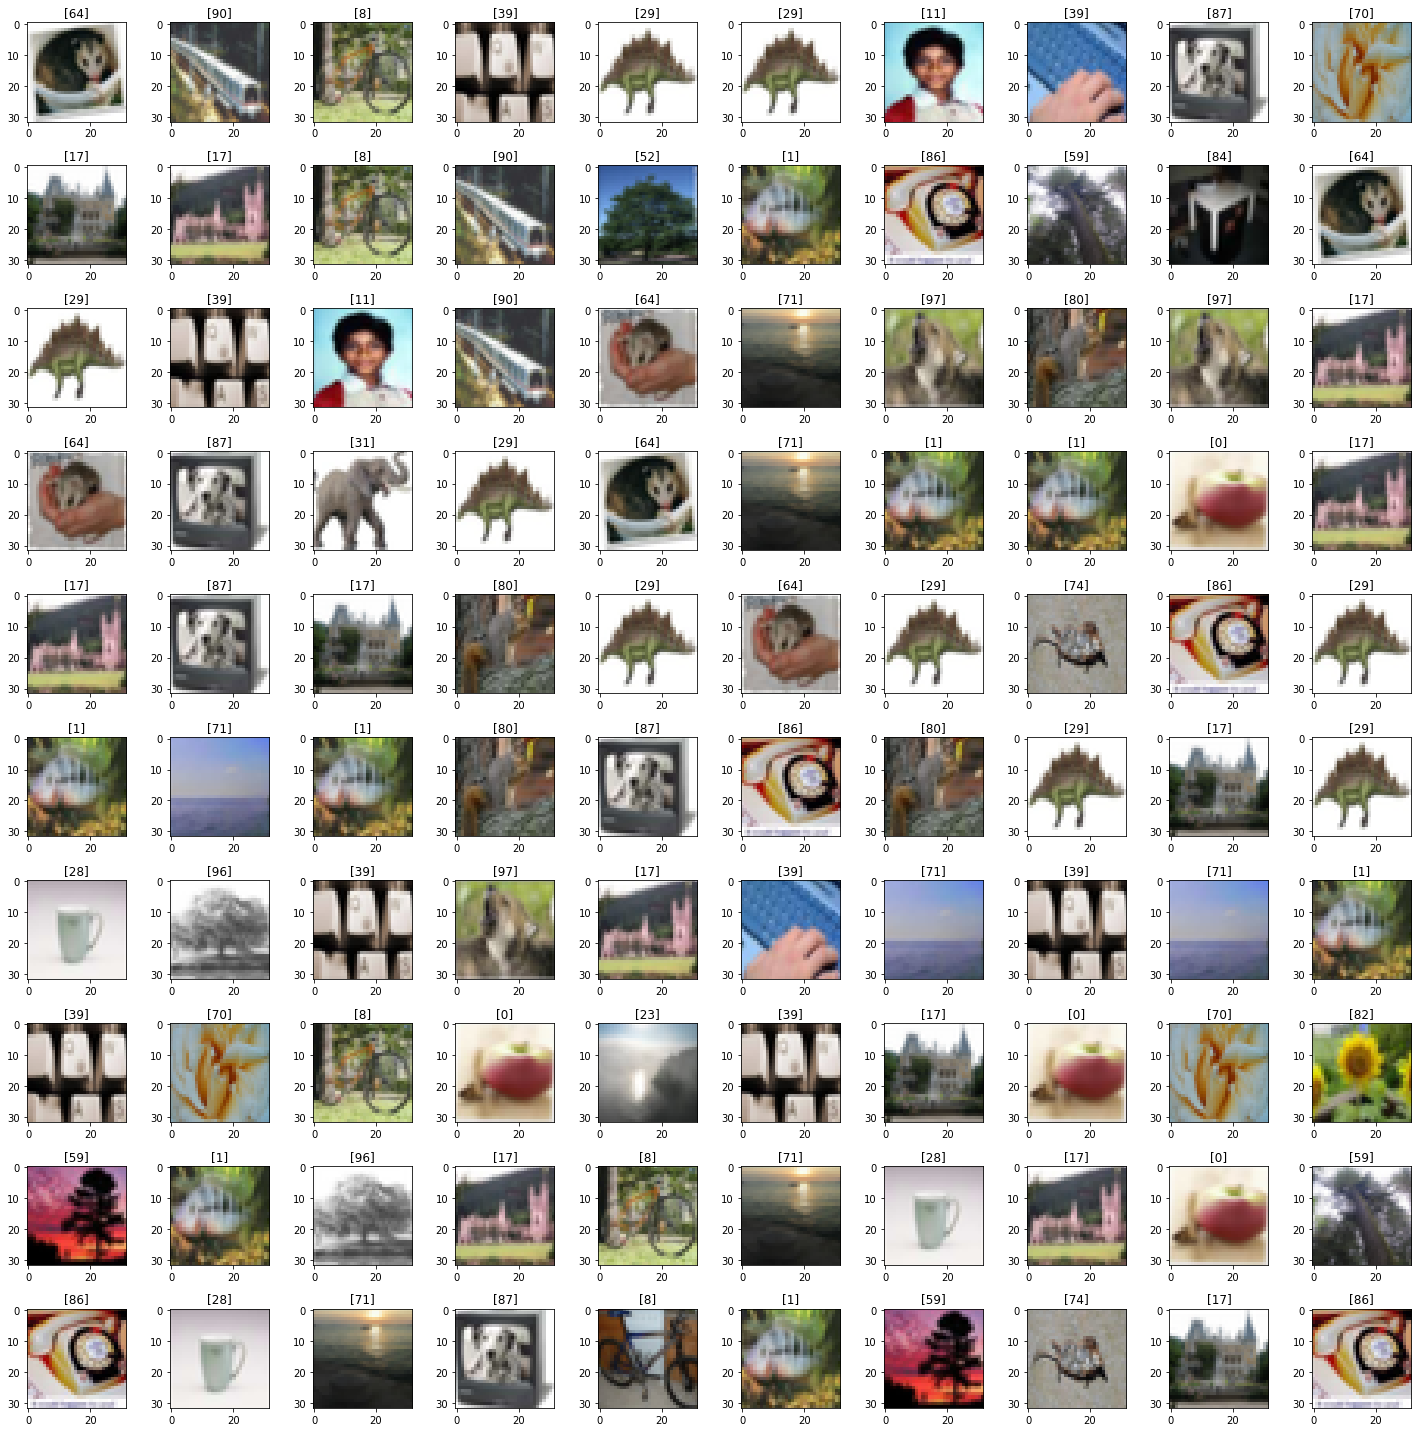

In [5]:
def image(data, labels):
    plt.subplots(figsize=(20, 20))
    for i in range(100):
        plt.subplot(10, 10, i+1)
        k = np.random.randint(1, data.shape[1])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
  
image(x_train, y_train)

In [6]:
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)
  
y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [7]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu',
                  input_shape=(32, 32, 3), padding='same'),
    layers.Conv2D(32, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  padding='same'),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(100, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                        

In [8]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=32,
                 verbose=1,
                 validation_data=(x_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 900s 572ms/step - loss: 4.2498 - accuracy: 0.0650 - val_loss: 3.9809 - val_accuracy: 0.1154
Epoch 2/10
1563/1563 [==============================] - 914s 585ms/step - loss: 3.6600 - accuracy: 0.1412 - val_loss: 60.5003 - val_accuracy: 0.2089
Epoch 3/10
1563/1563 [==============================] - 914s 585ms/step - loss: 3.5998 - accuracy: 0.1531 - val_loss: 339.7322 - val_accuracy: 0.1920
Epoch 4/10
1563/1563 [==============================] - 908s 581ms/step - loss: 3.1989 - accuracy: 0.2206 - val_loss: 289.5999 - val_accuracy: 0.2366
Epoch 5/10
1563/1563 [==============================] - 927s 593ms/step - loss: 2.9546 - accuracy: 0.2684 - val_loss: 115.4267 - val_accuracy: 0.2839
Epoch 6/10
1563/1563 [==============================] - 1016s 650ms/step - loss: 2.7271 - accuracy: 0.3097 - val_loss: 8.8447 - val_accuracy: 0.3263
Epoch 7/10
1563/1563 [==============================] - 951s 608ms/step - loss: 2.5180 - accuracy: 0.353